In [2]:
# import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from scipy import stats
from scipy.stats import linregress

# Hypotheses 

### 4.1) Staffing Shortages from 2020 to 2022 vs. Inpatient Occupancy (Adult and Pediatric) at Hostpitals across the US

Null 4.1: There is no relationship between staff shortages and inpatient occupancy from 2020 to 2022

Alternative 4.1: There is a relationship between critical staff shortages and adult and/or pediatric inpatient occupancy from 2020 to 2022
    
### 4.2) Staffing Shortages from 2020 to 2022 vs. Confirmed Covid Cases (Adult and Pediatric) at Hostpitals across the US    
    
Null 4.2: There is no relationship between staff shortages and confirmed covid cases from 2020 to 2022

Alternative 4.1: There is a relationship between critical staff shortages and confirmed covid cases in adult and/or pediatrics from 2020 to 2022    
    

### Hypothesis 4.1
Bring in data and select columns of interest 

In [30]:
# display dataset as a Pandas DataFrame
data_H3 = pd.read_csv('Resources/COVID_staff_shortages.csv')

#add columns for year, month, data for additional grouping/analysis 
data_H3['date_for_split'] = data_H3['date']
data_H3[['year', 'month','day']] = data_H3['date_for_split'].str.split('/', 2, expand=True)
data_H3

#make df with select data of interest
select_df = data_H3[['state','date','year','month','day',
                'critical_staffing_shortage_today_yes','critical_staffing_shortage_today_no','critical_staffing_shortage_today_not_reported',
                'inpatient_beds','inpatient_beds_used',
                'previous_day_admission_adult_covid_confirmed',
                'previous_day_admission_pediatric_covid_confirmed',
                'all_pediatric_inpatient_bed_occupied','all_pediatric_inpatient_beds',
                'previous_day_deaths_covid_and_influenza_coverage',]]
select_df

,state,date,year,month,day,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,critical_staffing_shortage_today_not_reported,inpatient_beds,inpatient_beds_used,previous_day_admission_adult_covid_confirmed,previous_day_admission_pediatric_covid_confirmed,all_pediatric_inpatient_bed_occupied,all_pediatric_inpatient_beds,previous_day_deaths_covid_and_influenza_coverage
0,ME,2021/01/23,2021,01,23,1,30,8,3229.0,2231.0,15.0,0.0,174.0,226.0,38
1,SD,2021/01/23,2021,01,23,2,60,3,2868.0,1641.0,8.0,1.0,291.0,387.0,62
2,MD,2021/01/22,2021,01,22,2,57,1,11827.0,9635.0,217.0,0.0,648.0,902.0,59
3,RI,2021/01/22,2021,01,22,6,8,1,2402.0,2445.0,25.0,0.0,635.0,573.0,14
4,ID,2021/01/21,2021,01,21,4,40,8,3694.0,2268.0,32.0,2.0,273.0,704.0,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54006,MT,2021/03/29,2021,03,29,6,58,1,2938.0,1762.0,8.0,0.0,45.0,86.0,64
54007,NJ,2021/03/09,2021,03,09,9,61,8,21569.0,15395.0,241.0,4.0,365.0,369.0,77
54008,NM,2021/05/19,2021,05,19,12,43,1,4446.0,3181.0,21.0,0.0,36.0,52.0,55
54009,NE,2021/04/15,2021,04,15,9,91,1,4368.0,2958.0,22.0,0.0,14.0,22.0,100


In [5]:
#group by year and month
#states

month_year_group = select_df.groupby(["year", "month"])
month_year_group_df = month_year_group.sum()

#create new column with sum of reported yes, no, and not reported
month_year_group_df['total_staffing'] = month_year_group_df.iloc[:, 0:3].sum(axis=1)
#percent shortage yes today
month_year_group_df['percent_shortage_today'] = ((month_year_group_df['critical_staffing_shortage_today_yes'] / month_year_group_df['total_staffing'])*100).round(2)
month_year_group_df['percent_inpatient_occupancy'] = ((month_year_group_df['inpatient_beds_used'] / month_year_group_df['inpatient_beds'])*100).round(2)
month_year_group_df['percent_pediatric_occupancy'] = ((month_year_group_df['all_pediatric_inpatient_bed_occupied'] / month_year_group_df['all_pediatric_inpatient_beds'])*100).round(2)

month_year_group_df

#print to csv
#month_year_group_df.to_csv('month_year_group_df.csv')

critical_staffing_shortage_today_yes  \
year month                                         
2020 01                                       80   
     02                                        0   
     03                                        0   
     04                                       30   
     05                                        6   
     06                                       48   
     07                                    10034   
     08                                    24221   
     09                                    25951   
     10                                    29044   
     11                                    32528   
     12                                    37456   
2021 01                                    31865   
     02                                    22916   
     03                                    21294   
     04                                    19784   
     05                                    19979   
     06                                    18246   
     07                                    19202   
     08                                    23797   
     09                                    29035   
     10                                    30184   
     11                                    28507   
     12                                    31424   
2022 01                                    28320   
     02                                    11382   
     03                                     9509   
     04                                     8706   
     05                                     8642   
     06                                     8218   
     07                                     9203   
     08                                     9206   
     09                                     7896   
     10                                     7708   
     11                                     7104   
     12                                      249   

            critical_staffing_shortage_today_no  \
year month                                        
2020 01                                     220   
     02                                       0   
     03                                       6   
     04                                     257   
     05                                     235   
     06                                     442   
     07                                   39506   
     08                                  107763   
     09                                  123922   
     10                                  144423   
     11                                  138355   
     12                                  138220   
2021 01                                  141469   
     02                                  131354   
     03                                  148516   
     04                                  143240   
     05                                  147207   
     06                                  140994   
     07                                  141201   
     08                                  127523   
     09                                  119585   
     10                                  123554   
     11                                  118919   
     12                                  122245   
2022 01                                  113384   
     02                                   89060   
     03                                   98934   
     04                                   95445   
     05                                   97796   
     06                                   95370   
     07                                  100482   
     08                                   96393   
     09                                   80925   
     10                                   81964   
     11                                   77258   
     12                                    2480   

            critical_staffing_shortage_today_not_reported  inpatient_beds  \
year month         

### Hypothesis 4.1
Group data to plot and compare the flux of the percentage changes in staff shortages and percent inpatient occupancy (adult and pediatric) from Jan 2020 (month 1) to Dec 2022 (month 36)

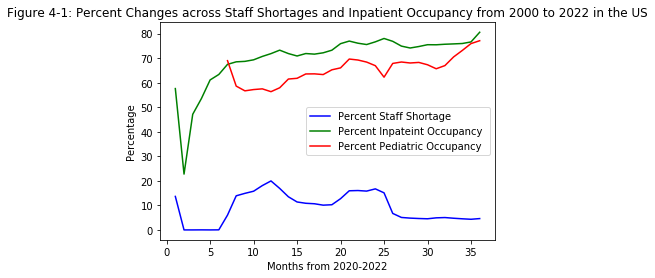

In [13]:

#line chart
#plot percent shortage as a line chart
months = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36]

#items to plot 
shortage_percent_today = month_year_group_df["percent_shortage_today"]
inpatient_occupancy = month_year_group_df['percent_inpatient_occupancy']
pediatric_occupancy = month_year_group_df['percent_pediatric_occupancy']


percent_shortage_today = plt.plot(months,shortage_percent_today, color="blue", label="Percent Staff Shortage")
inpatient_occupancy_today = plt.plot(months,inpatient_occupancy, color="green", label="Percent Inpateint Occupancy ")
pediatric_occupancy_today = plt.plot(months,pediatric_occupancy, color="red", label="Percent Pediatric Occupancy")

# Create a legend for our chart
plt.legend(handles=[percent_shortage_today[0], inpatient_occupancy_today[0], pediatric_occupancy_today[0]], loc="best")
plt.xlabel("Months from 2020-2022")
plt.ylabel("Percentage")
plt.title("Figure 4-1: Percent Changes across Staff Shortages and Inpatient Occupancy from 2000 to 2022 in the US",loc='center')
#show the chart
plt.show()

#Adult confirmed covidb
#pediatric confirmed covid 
#Reported patients currently hospitalized in an adult ICU bed who have confirmed COVID-19 in this state

In [14]:
#confirm the amount of time points taken each year are not identical across all years
select_df['year'].value_counts()

2021    19475
2022    18090
2020    16446
Name: year, dtype: int64

### Hypothesis 4.1
Breakout data by year to compare the flux of the percentage changes in staff shortages and percent inpatient occupancy (adult and pediatric) Jan - Dec in each of the three calendar years

In [16]:
#dataframe for only 2020
select_2020 = select_df.loc[select_df['year'] == '2020', :]
#dataframe for only 2021
select_2021 = select_df.loc[select_df['year'] == '2021',:]
#dataframe for 2022
select_2022 =  select_df.loc[select_df['year'] == '2022',:]

#group by date 2020 
date_2020_group = select_2020.groupby(["date"])
date_2020_group_df = date_2020_group.sum()
#create new column with sum of reported yes, no, and not reported
date_2020_group_df['total_staffing'] = date_2020_group_df.iloc[:, 0:3].sum(axis=1)
#percent shortage yes today
date_2020_group_df['percent_shortage_today'] = ((date_2020_group_df['critical_staffing_shortage_today_yes'] / date_2020_group_df['total_staffing'])*100).round(2)
#percent shortage inpatient today
date_2020_group_df['percent_inpatient_occupancy'] = ((date_2020_group_df['inpatient_beds_used'] / date_2020_group_df['inpatient_beds'])*100).round(2)
#percent shortage pediatric patient today
date_2020_group_df['percent_pediatric_occupancy'] = ((date_2020_group_df['all_pediatric_inpatient_bed_occupied'] / date_2020_group_df['all_pediatric_inpatient_beds'])*100).round(2)
date_2020_group_df.to_csv('date_2020_group_df.csv')

#group by date 2021
date_2021_group = select_2021.groupby(["date"])
date_2021_group_df = date_2021_group.sum()
#create new column with sum of reported yes, no, and not reported
date_2021_group_df['total_staffing'] = date_2021_group_df.iloc[:, 0:3].sum(axis=1)
#percent shortage yes today
date_2021_group_df['percent_shortage_today'] = ((date_2021_group_df['critical_staffing_shortage_today_yes'] / date_2021_group_df['total_staffing'])*100).round(2)
#percent shortage inpatient today
date_2021_group_df['percent_inpatient_occupancy'] = ((date_2021_group_df['inpatient_beds_used'] / date_2021_group_df['inpatient_beds'])*100).round(2)
#percent shortage pediatric patient today
date_2021_group_df['percent_pediatric_occupancy'] = ((date_2021_group_df['all_pediatric_inpatient_bed_occupied'] / date_2021_group_df['all_pediatric_inpatient_beds'])*100).round(2)
date_2021_group_df.to_csv('date_2021_group_df.csv')

#group by date 2022
date_2022_group = select_2022.groupby(["date"])
date_2022_group_df = date_2022_group.sum()
#create new column with sum of reported yes, no, and not reported
date_2022_group_df['total_staffing'] = date_2022_group_df.iloc[:, 0:3].sum(axis=1)
#percent shortage yes today
date_2022_group_df['percent_shortage_today'] = ((date_2022_group_df['critical_staffing_shortage_today_yes'] / date_2022_group_df['total_staffing'])*100).round(2)
#percent shortage inpatient today
date_2022_group_df['percent_inpatient_occupancy'] = ((date_2022_group_df['inpatient_beds_used'] / date_2022_group_df['inpatient_beds'])*100).round(2)
#percent shortage pediatric patient today
date_2022_group_df['percent_pediatric_occupancy'] = ((date_2022_group_df['all_pediatric_inpatient_bed_occupied'] / date_2022_group_df['all_pediatric_inpatient_beds'])*100).round(2)
date_2022_group_df.to_csv('date_2022_group_df.csv')


### Hypothesis 4.1
Create a scatterplot to compare the percent staff shortages and adult occupancy in 2020 along with a regression line - Do they both increase at the same time? Decrease? no relationship?

The r-value is: 0.4261575948262478


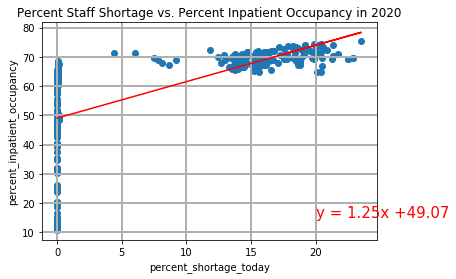

In [22]:
#create scatter plot shortage vs percent inpatient 2020
x_values = date_2020_group_df['percent_shortage_today']
y_values = date_2020_group_df['percent_inpatient_occupancy']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.title("Percent Staff Shortage vs. Percent Inpatient Occupancy in 2020")
plt.xlabel('percent_shortage_today')
plt.ylabel('percent_inpatient_occupancy')
# add dot size and color outline 
plt.grid(linestyle='-', linewidth=2)

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


plt.plot(x_values,regress_values,"r-")
# Label plot and annotate the line equation

plt.annotate(line_eq,(20,15),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")

# Show plot
#plt.tight_layout()
plt.show()

### Hypothesis 4.1
Create a scatterplot to compare the percent staff shortages at >= 5% and adult occupancy in 2020 along with a regression line - Do they both increase at the same time? Decrease? no relationship?

The r-value is: 0.15799358920737816


/Users/nicolettealbright/opt/anaconda3/envs/pythondata/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 


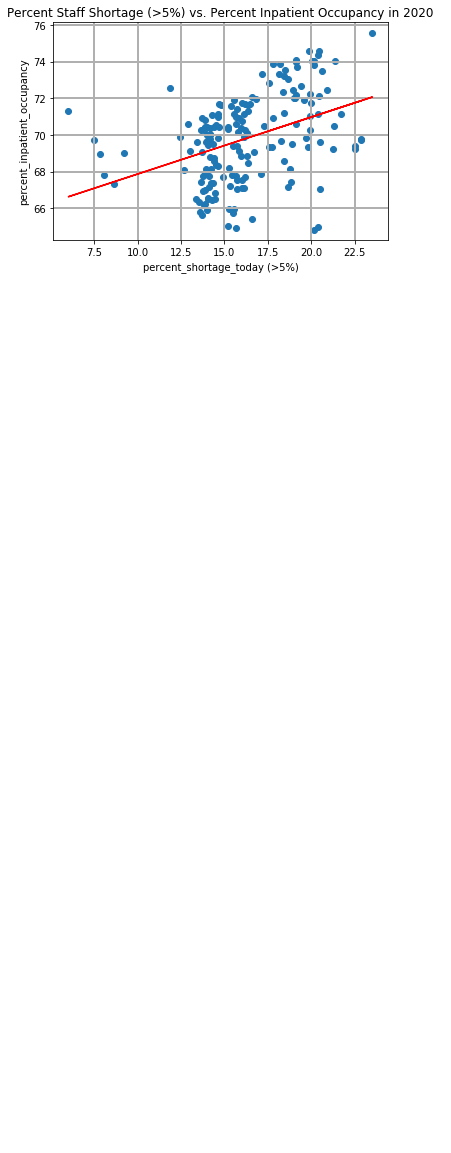

In [23]:
# Create a DataFrame with the percent shortage >= 5%)
date_2020_group_df_g5 = date_2020_group_df.loc[date_2020_group_df['percent_shortage_today'] >=5 , :]

# Display scatter plot with similar data filtered 
x_values_g5 = date_2020_group_df_g5['percent_shortage_today']
y_values_g5 = date_2020_group_df_g5['percent_inpatient_occupancy']
plt.scatter(x_values_g5,y_values_g5)

# Incorporate the other graph properties
plt.title("Percent Staff Shortage (>5%) vs. Percent Inpatient Occupancy in 2020")
plt.xlabel('percent_shortage_today (>5%)')
plt.ylabel('percent_inpatient_occupancy')
# add dot size and color outline 
plt.grid(linestyle='-', linewidth=2)

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_g5, y_values_g5)
regress_values = x_values_g5 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


plt.plot(x_values_g5,regress_values,"r-")
# Label plot and annotate the line equation

plt.annotate(line_eq,(20,15),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

# Show plot
plt.tight_layout()
plt.show()

### Hypothesis 4.1
Create a scatterplot to compare the percent staff shortages and pediatric occupancy in 2020 along with a regression line - Do they both increase at the same time? Decrease? no relationship?

The r-value is: nan


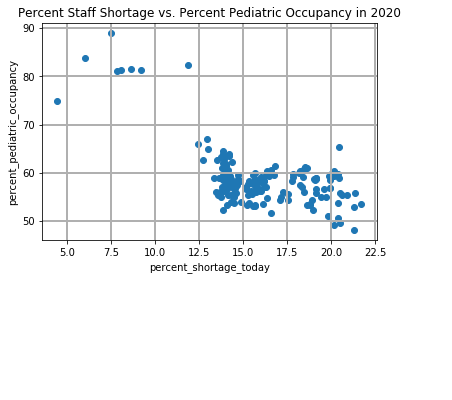

In [24]:
#create scatter plot shortage vs percent prdiatric 2020
x_values_ped_2020 = date_2020_group_df['percent_shortage_today']
y_values_ped_2020 = date_2020_group_df['percent_pediatric_occupancy']
plt.scatter(x_values_ped_2020,y_values_ped_2020)

# Incorporate the other graph properties
plt.title("Percent Staff Shortage vs. Percent Pediatric Occupancy in 2020")
plt.xlabel('percent_shortage_today')
plt.ylabel('percent_pediatric_occupancy')
# add dot size and color outline 
plt.grid(linestyle='-', linewidth=2)

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_ped_2020, y_values_ped_2020)
regress_values = x_values_ped_2020 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


plt.plot(x_values_ped_2020,regress_values,"r-")
# Label plot and annotate the line equation

plt.annotate(line_eq,(20,15),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

# Show plot
#plt.tight_layout()
plt.show()

### Hypothesis 4.1
Create a scatterplot to compare the percent staff shortages and adult occupancy in 2021 along with a regression line - Do they both increase at the same time? Decrease? no relationship?

The r-value is: 0.2874537472379055


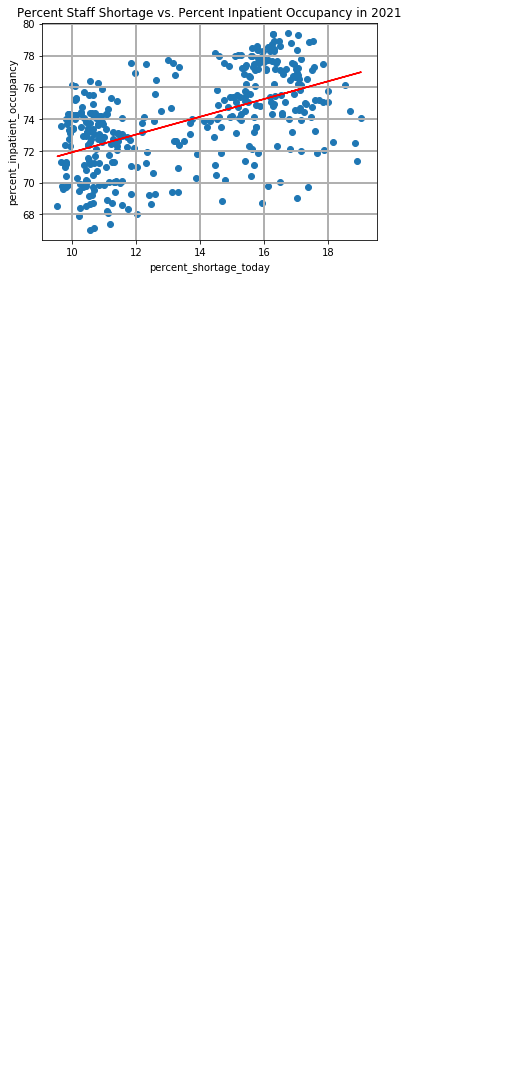

In [25]:
#create scatter plot shortage vs percent inpatient 2021
x_values_2021 = date_2021_group_df['percent_shortage_today']
#note min of percent shortage today is above 5% for 2021 so no need to filter 
y_values_2021 = date_2021_group_df['percent_inpatient_occupancy']
plt.scatter(x_values_2021,y_values_2021)

# Incorporate the other graph properties
plt.title("Percent Staff Shortage vs. Percent Inpatient Occupancy in 2021")
plt.xlabel('percent_shortage_today')
plt.ylabel('percent_inpatient_occupancy')
# add dot size and color outline 
plt.grid(linestyle='-', linewidth=2)

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_2021, y_values_2021)
regress_values = x_values_2021 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


plt.plot(x_values_2021,regress_values,"r-")
# Label plot and annotate the line equation

plt.annotate(line_eq,(20,15),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

# Show plot
#plt.tight_layout()
plt.show()

### Hypothesis 4.1
Create a scatterplot to compare the percent staff shortages and pediatric occupancy in 2021 along with a regression line - Do they both increase at the same time? Decrease? no relationship?

The r-value is: 0.024683530553724953


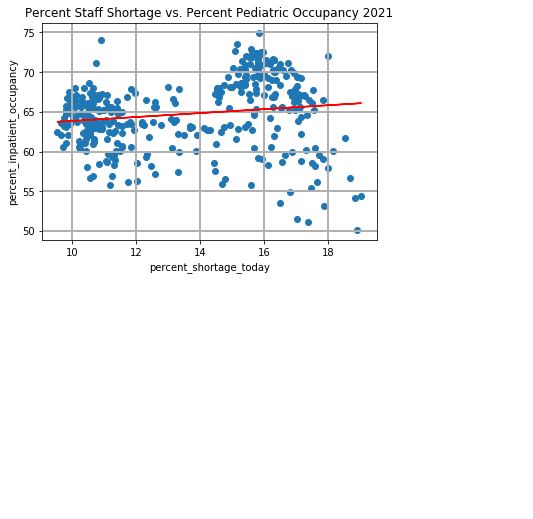

In [26]:
#create scatter plot shortage vs percent Pediatric 2021
x_values_2021 = date_2021_group_df['percent_shortage_today']
#note min of percent shortage today is above 5% for 2021 so no need to filter 
y_values_2021_ped = date_2021_group_df['percent_pediatric_occupancy']
plt.scatter(x_values_2021,y_values_2021_ped)

# Incorporate the other graph properties
plt.title("Percent Staff Shortage vs. Percent Pediatric Occupancy 2021")
plt.xlabel('percent_shortage_today')
plt.ylabel('percent_inpatient_occupancy')
# add dot size and color outline 
plt.grid(linestyle='-', linewidth=2)

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_2021, y_values_2021_ped)
regress_values = x_values_2021 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


plt.plot(x_values_2021,regress_values,"r-")
# Label plot and annotate the line equation

plt.annotate(line_eq,(20,15),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

# Show plot
#plt.tight_layout()
plt.show()

### Hypothesis 4.1
Create a scatterplot to compare the percent staff shortages and adult occupancy in 2022 along with a regression line - Do they both increase at the same time? Decrease? no relationship?

The r-value is: 0.14303031654041856


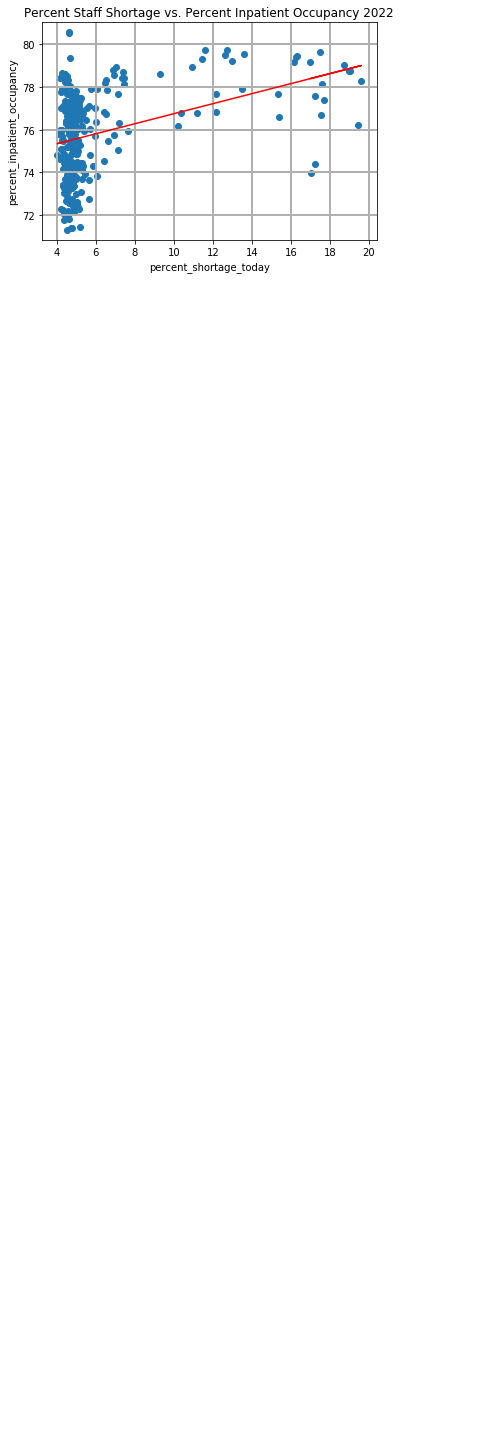

In [27]:
#create scatter plot shortage vs percent inpatient 2022
x_values_2022 = date_2022_group_df['percent_shortage_today']
#first try with mins below 5%
y_values_2022 = date_2022_group_df['percent_inpatient_occupancy']
plt.scatter(x_values_2022,y_values_2022)

# Incorporate the other graph properties
plt.title("Percent Staff Shortage vs. Percent Inpatient Occupancy 2022")
plt.xlabel('percent_shortage_today')
plt.ylabel('percent_inpatient_occupancy')
# add dot size and color outline 
plt.grid(linestyle='-', linewidth=2)

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_2022, y_values_2022)
regress_values = x_values_2022 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


plt.plot(x_values_2022,regress_values,"r-")
# Label plot and annotate the line equation

plt.annotate(line_eq,(20,15),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

# Show plot
#plt.tight_layout()
plt.show()

### Hypothesis 4.1
Create a scatterplot to compare the percent staff shortages and prdiatric occupancy in 2022 along with a regression line - Do they both increase at the same time? Decrease? no relationship?

The r-value is: 0.14303031654041856


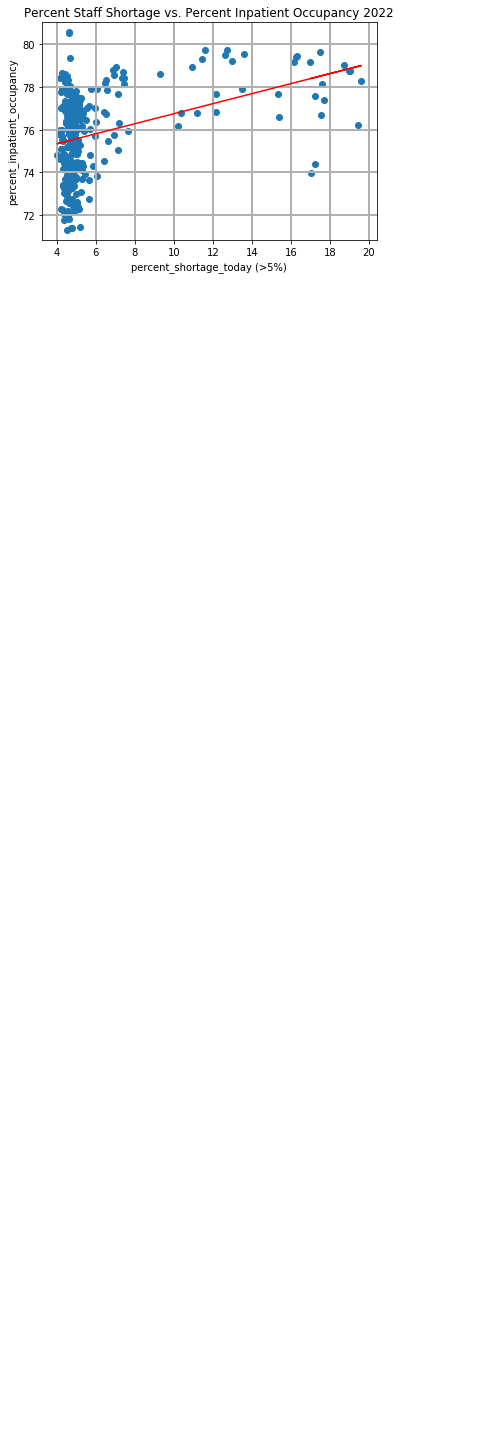

In [68]:

#create scatter plot shortage vs percent inpatient 2022
x_values_2022_g5 = date_2022_group_df['percent_shortage_today']
y_values_2022_g5 = date_2022_group_df['percent_inpatient_occupancy']
plt.scatter(x_values_2022_g5,y_values_2022_g5)

# Incorporate the other graph properties
plt.title("Percent Staff Shortage vs. Percent Inpatient Occupancy 2022")
plt.xlabel('percent_shortage_today (>5%)')
plt.ylabel('percent_inpatient_occupancy')
# add dot size and color outline 
plt.grid(linestyle='-', linewidth=2)

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_2022_g5, y_values_2022_g5)
regress_values = x_values_2022_g5 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


plt.plot(x_values_2022_g5,regress_values,"r-")
# Label plot and annotate the line equation

plt.annotate(line_eq,(20,15),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

# Show plot
#plt.tight_layout()
plt.show()

### Hypothesis 4.2
Group data to plot and compare the flux of the percentage changes in staff shortages and total confirmed covid cases (adult and pediatric) from Jan 2020 (month 1) to Dec 2022 (month 36). 

Note: covid confirmations reported for previous day, this needs to be shifted so comparing across same day.

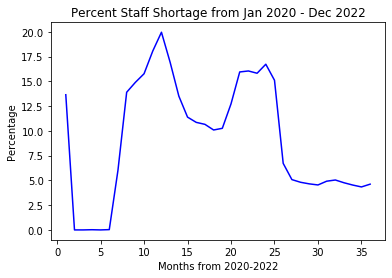

In [65]:
#Shift data from "previous day covid confirm so it is on the correct day"
sorted_df = select_df.sort_values(by='date')
sorted_df[['admission_pediatric_covid_confirmed','previous_day_admission_adult_covid_confirmed']] = sorted_df[['previous_day_admission_pediatric_covid_confirmed','previous_day_admission_adult_covid_confirmed']].shift(-1)
#re-group shifted data for use 
month_year_group_shifted = sorted_df.groupby(["year", "month"])
month_year_group_shifted = month_year_group.sum()
month_year_group_shifted

#create new column with sum of reported yes, no, and not reported
month_year_group_shifted['total_staffing'] = month_year_group_shifted.iloc[:, 0:3].sum(axis=1)
#percent shortage yes today
month_year_group_shifted['percent_shortage_today'] = ((month_year_group_shifted['critical_staffing_shortage_today_yes'] / month_year_group_shifted['total_staffing'])*100).round(2)


#plot percent shortage as a line chart
months = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36]

#items to plot 
shortage_percent_today = month_year_group_shifted["percent_shortage_today"]
percent_shortage_today = plt.plot(months,shortage_percent_today, color="blue", label="Percent Staff Shortage Today")
plt.title("Percent Staff Shortage from Jan 2020 - Dec 2022")
plt.xlabel("Months from 2020-2022")
plt.ylabel("Percentage")
#show the chart
plt.show()

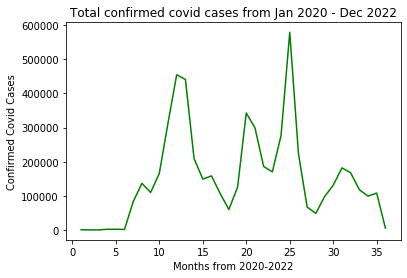

In [66]:

'''ADULT CASES COVID'''
#plot covid admitance thorugh entire time line
months = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36]


#previous_day_admission_adult_covid_confirmed
adult_confirm = month_year_group_shifted['previous_day_admission_adult_covid_confirmed']

adult_confirm_yeasterday = plt.plot(months,adult_confirm, color="green", label="Adult Confirm Covid")

plt.title("Total confirmed covid cases from Jan 2020 - Dec 2022")
plt.xlabel("Months from 2020-2022")
plt.ylabel("Confirmed Covid Cases")
#show the chart
plt.show()

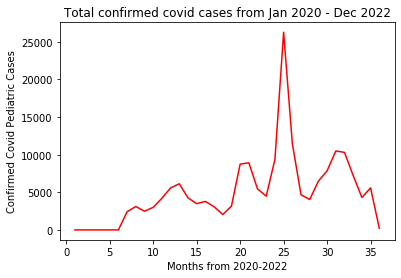

In [67]:
'''Pediatric CASES COVID'''
#plot covid admitance thorugh entire time line for x axis
months = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36]

#Y axis to plot 
pediatric_confirm = month_year_group_shifted['previous_day_admission_pediatric_covid_confirmed']
#plot and make pretty
pediatric_confirm_yeasterday = plt.plot(months,pediatric_confirm, color="red", label="Pediatric Confirm Covid")
plt.title("Total confirmed covid cases from Jan 2020 - Dec 2022")
plt.xlabel("Months from 2020-2022")
plt.ylabel("Confirmed Covid Pediatric Cases")
#show the chart
plt.show()

The r-value is: 0.502470976097904


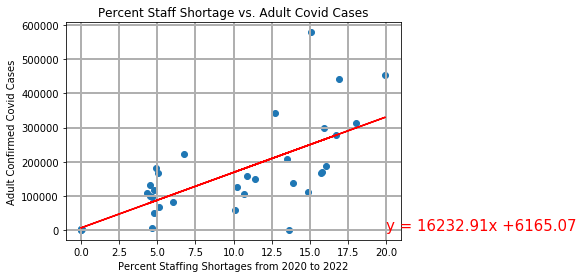

In [72]:

#create scatter plot shortage vs adult covid cases

plt.scatter(shortage_percent_today,adult_confirm)

# Incorporate the other graph properties
plt.title("Percent Staff Shortage vs. Adult Covid Cases")
plt.xlabel('Percent Staffing Shortages from 2020 to 2022')
plt.ylabel('Adult Confirmed Covid Cases')
# add dot size and color outline 
plt.grid(linestyle='-', linewidth=2)

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(shortage_percent_today, adult_confirm)
regress_values = shortage_percent_today * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


plt.plot(shortage_percent_today,regress_values,"r-")
# Label plot and annotate the line equation

plt.annotate(line_eq,(20,15),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

# Show plot
#plt.tight_layout()
plt.show()

The r-value is: 0.08722342288547885


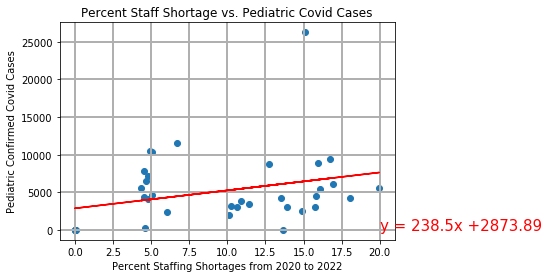

In [73]:
#create scatter plot shortage vs pediatric covid cases

plt.scatter(shortage_percent_today,pediatric_confirm)

# Incorporate the other graph properties
plt.title("Percent Staff Shortage vs. Pediatric Covid Cases")
plt.xlabel('Percent Staffing Shortages from 2020 to 2022')
plt.ylabel('Pediatric Confirmed Covid Cases')
# add dot size and color outline 
plt.grid(linestyle='-', linewidth=2)

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(shortage_percent_today, pediatric_confirm)
regress_values = shortage_percent_today * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


plt.plot(shortage_percent_today,regress_values,"r-")
# Label plot and annotate the line equation

plt.annotate(line_eq,(20,15),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

# Show plot
#plt.tight_layout()
plt.show()